In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('Marketing_data.csv')

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
creditcard_df.info()
# Let's apply info and get additional insights on our dataframe
# 18 features with 8950 points 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CHALLENGE #1: 
What is the average, minimum and maximum "BALANCE" amount?

In [7]:
print('Average,min,max=',creditcard_df['BALANCE'].mean(),creditcard_df['BALANCE'].min(),creditcard_df['BALANCE'].max())

Average,min,max= 1564.4748276781038 0.0 19043.13856


MINI CHALLENGE #2: 
Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [8]:
creditcard_df['CUST_ID'][creditcard_df['ONEOFF_PURCHASES']==creditcard_df['ONEOFF_PURCHASES'].max()]

550    C10574
Name: CUST_ID, dtype: object

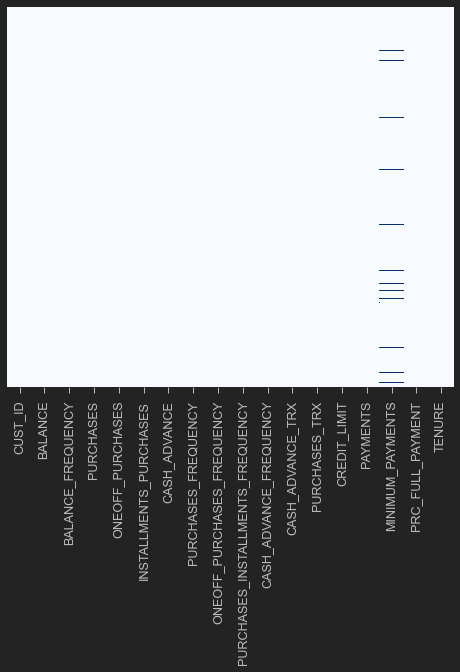

In [9]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
creditcard_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [13]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

MINI CHALLENGE #4: 
Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [15]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [16]:
n = len(creditcard_df.columns)
n

17

C:\Users\Bahar Huseynova\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


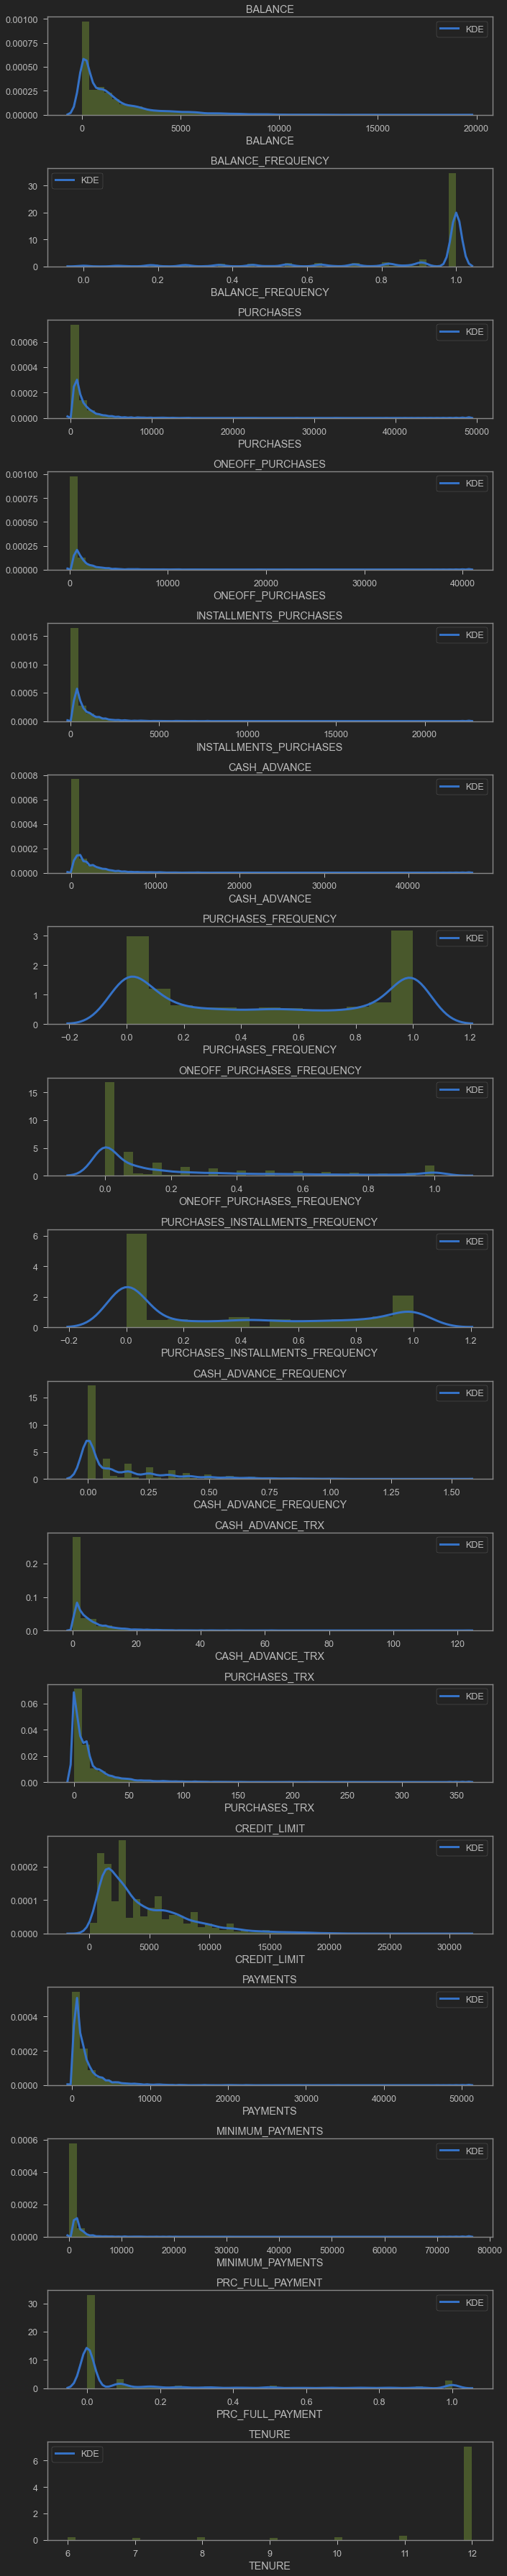

In [17]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

MINI CHALLENGE #5: 
Obtain the correlation matrix between features

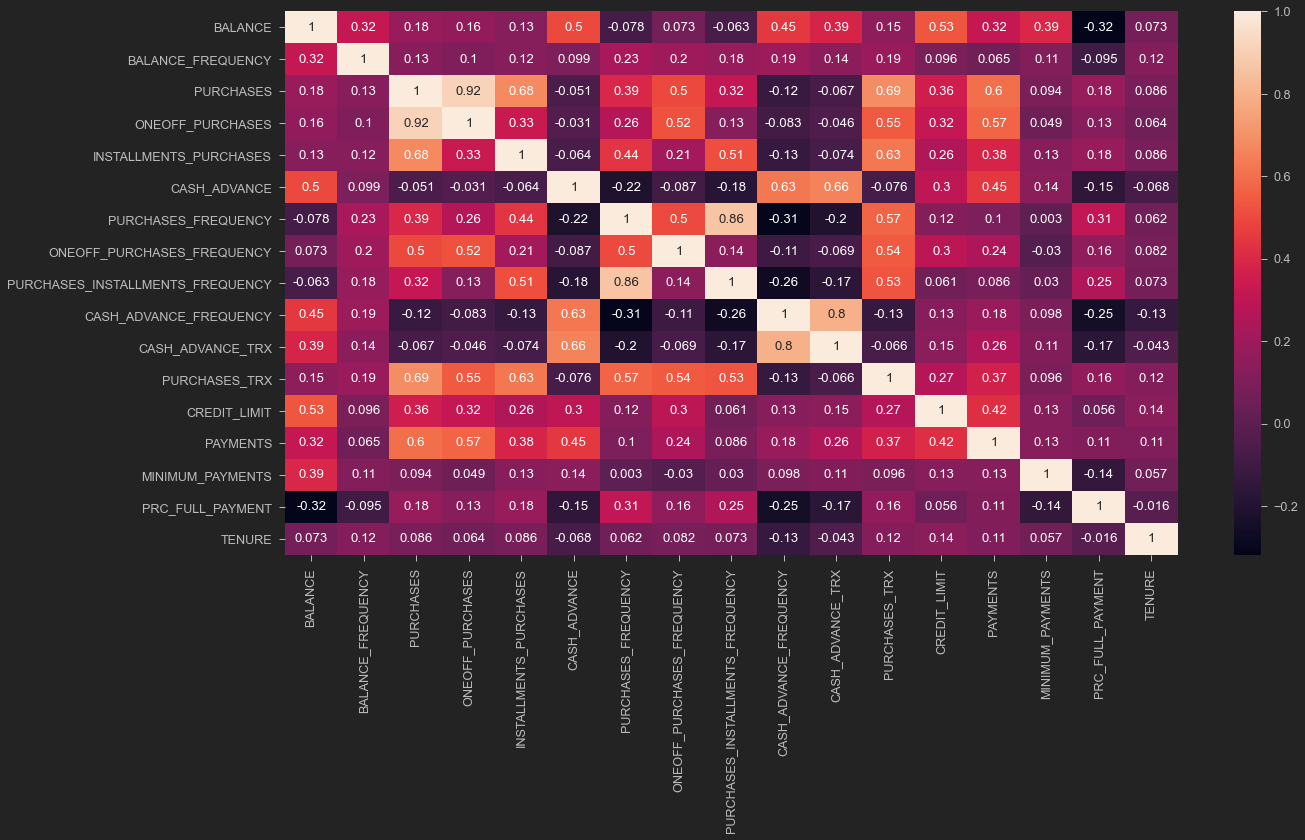

In [18]:
corre=creditcard_df.corr()
f,ax,=plt.subplots(figsize=(20,10))
sns.heatmap(corre,annot=True)

MINI CHALLENGE #6: 
The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

In [19]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [20]:
creditcard_df_scaled.shape

(8950, 17)

In [21]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

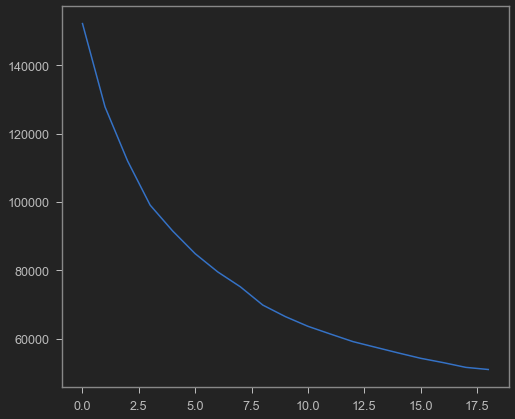

In [39]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')
scores_1=[]
range_values=range(1,20)
for i in range_values :
    k_means=KMeans(n_clusters=i)
    k_means.fit(creditcard_df_scaled)
    scores_1.append(k_means.inertia_)

plt.plot(scores_1,'bx-')
    
    


# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.


MINI CHALLENGE #7:
Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells

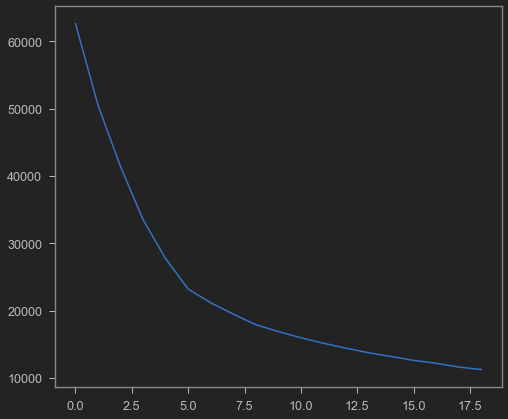

In [45]:
scores_1=[]
range_values=range(1,20)
for i in range_values :
    k_means=KMeans(n_clusters=i)
    k_means.fit(creditcard_df_scaled[:,:7])
    scores_1.append(k_means.inertia_)

plt.plot(scores_1,'bx-')

In [46]:
#applying kmeans method
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [47]:
kmeans.cluster_centers_.shape

(7, 17)

In [48]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.010938,0.402482,-0.344827,-0.225454,-0.401030,-0.099807,-0.816625,-0.337908,-0.758294,0.092522,-0.035272,-0.466798,-0.300400,-0.246082,-0.014250,-0.451878,0.272288
1,0.140452,0.430197,0.959883,0.910002,0.597777,-0.306101,1.096098,1.872130,0.540744,-0.408002,-0.316802,1.216834,0.713763,0.403713,-0.031013,0.464411,0.307558
2,1.454739,0.410728,7.198919,6.350667,5.351720,0.022162,1.080082,1.865511,1.027240,-0.285268,-0.103238,4.793598,2.184285,4.957935,1.134973,0.810140,0.332303
3,-0.335429,-0.342203,-0.283935,-0.208973,-0.287081,0.064839,-0.194773,-0.272572,-0.227255,0.303119,-0.002449,-0.385075,-0.558209,-0.390348,-0.209893,0.018334,-3.193765
4,1.677170,0.394427,-0.200441,-0.147733,-0.202618,2.003646,-0.450585,-0.185544,-0.399412,1.914017,1.930195,-0.236071,1.017074,0.839308,0.556188,-0.391202,0.067181
5,-0.701970,-2.131740,-0.306973,-0.230512,-0.302228,-0.323191,-0.546964,-0.427620,-0.441465,-0.522239,-0.377026,-0.416312,-0.172349,-0.202660,-0.257492,0.295386,0.198809
6,-0.368966,0.332744,-0.041406,-0.231449,0.327137,-0.368972,0.973807,-0.346106,1.163213,-0.477721,-0.363066,0.169310,-0.275857,-0.223804,-0.031027,0.295617,0.254396


In [49]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1587.240640,0.972615,266.477066,218.230565,48.421246,769.570455,0.162599,0.101653,0.063072,0.153659,3.008121,3.106992,3401.471281,1020.760724,830.998431,0.021548,11.881709
1,1856.813544,0.979180,3054.009518,2102.853926,951.629526,336.963028,0.930268,0.760950,0.579343,0.053499,1.086888,44.955766,7091.411748,2901.853046,791.932367,0.289547,11.928910
2,4592.391787,0.974568,16383.805949,11133.244430,5250.561519,1025.346420,0.923840,0.758976,0.772689,0.078059,2.544304,133.860759,12441.772152,16085.879422,3509.213730,0.390667,11.962025
3,866.307935,0.796206,396.572925,245.585564,151.464308,1114.841673,0.412179,0.121144,0.274121,0.195801,3.232114,5.138315,2463.456994,603.125326,375.060353,0.159077,7.243243
4,5055.362392,0.970707,574.958725,347.230508,227.842968,5180.611063,0.309509,0.147106,0.205701,0.518159,16.420993,8.841986,8194.982557,4162.857941,2160.378174,0.039295,11.607223
5,103.383897,0.372281,347.352578,209.834887,137.766893,301.123814,0.270828,0.074890,0.188988,0.030639,0.675903,4.361881,3867.371490,1146.462357,264.133123,0.240110,11.783375
6,796.502335,0.956095,914.740576,208.279260,706.893478,205.118573,0.881186,0.099208,0.826728,0.039547,0.771166,18.918239,3490.769329,1085.253043,791.899449,0.240178,11.857765


In [50]:
labels.shape # Labels associated to each data point

(8950,)

In [51]:
labels.max()

6

In [52]:
labels.min()

0

In [53]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([0, 1, 3, ..., 6, 6, 6])

In [54]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


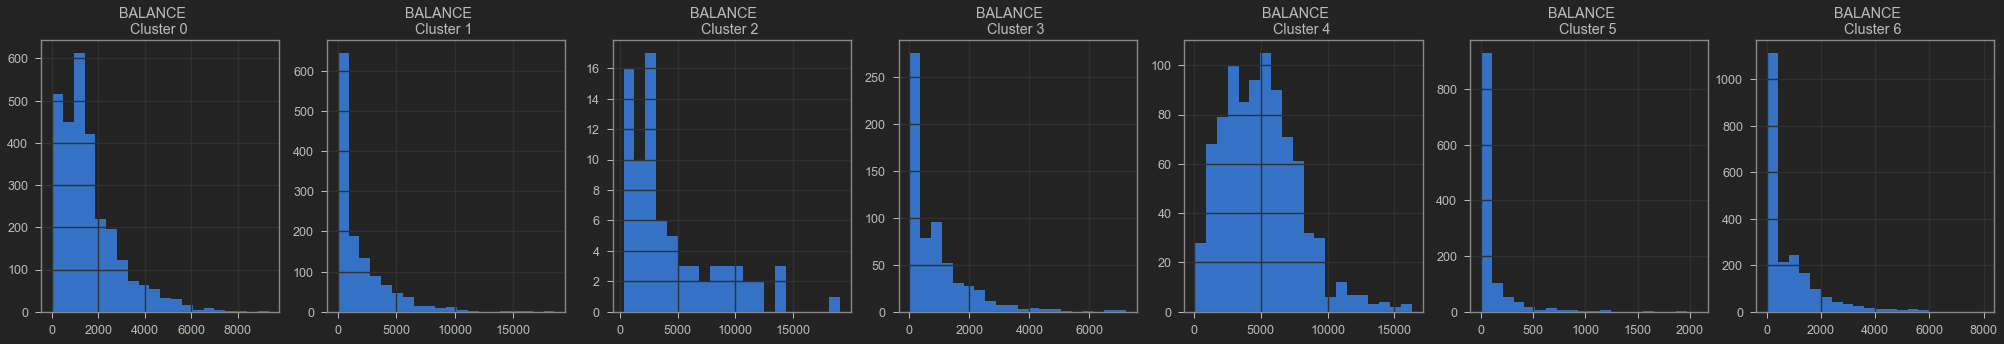

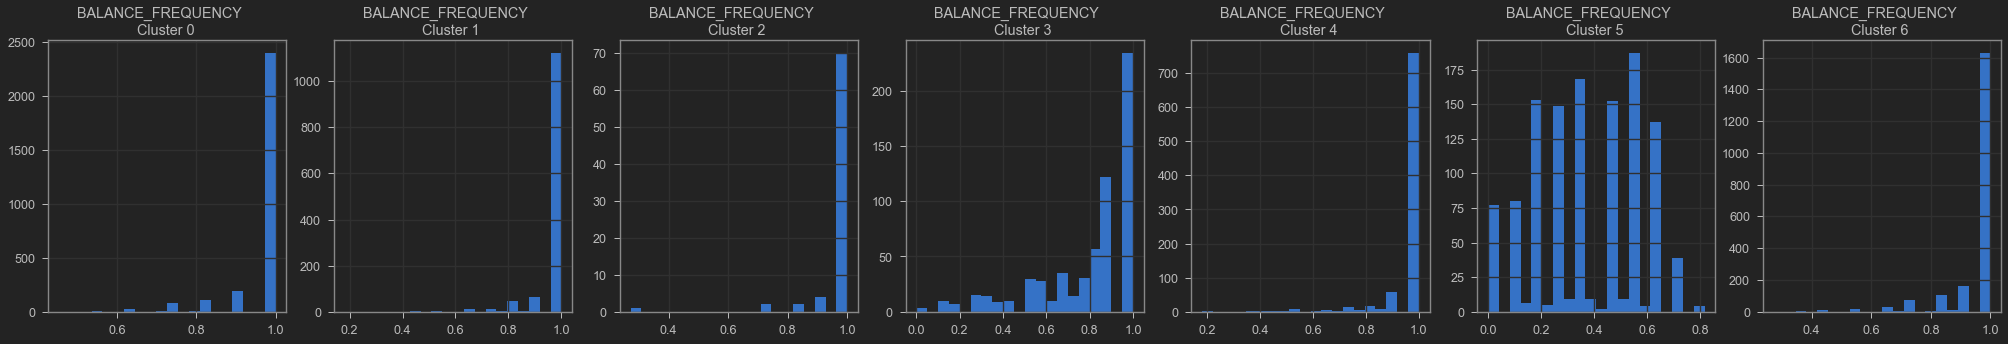

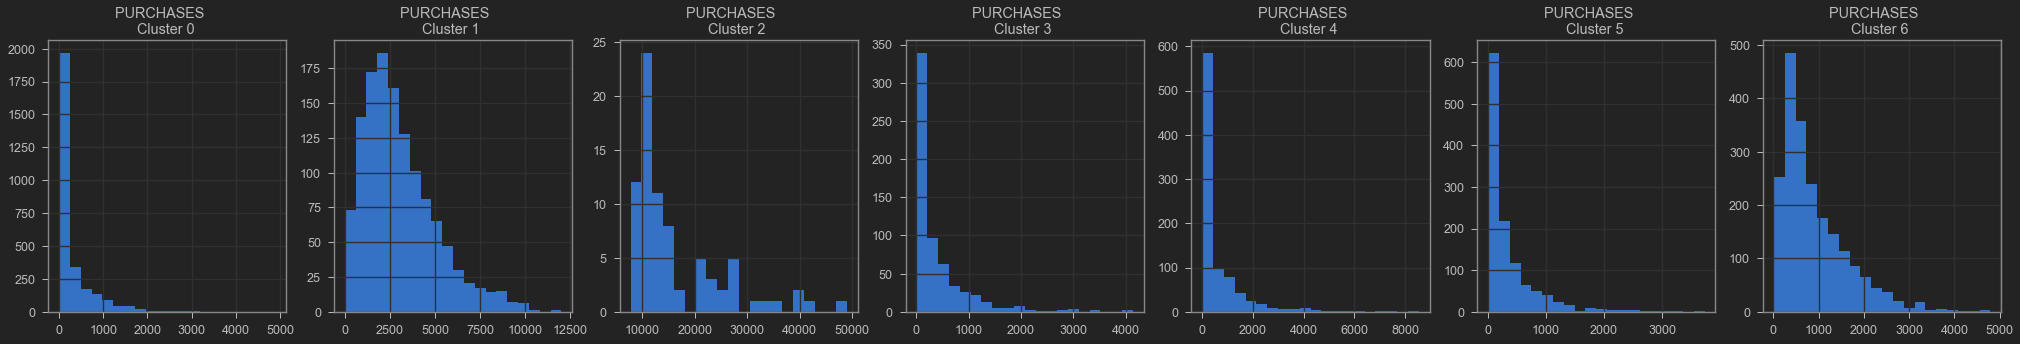

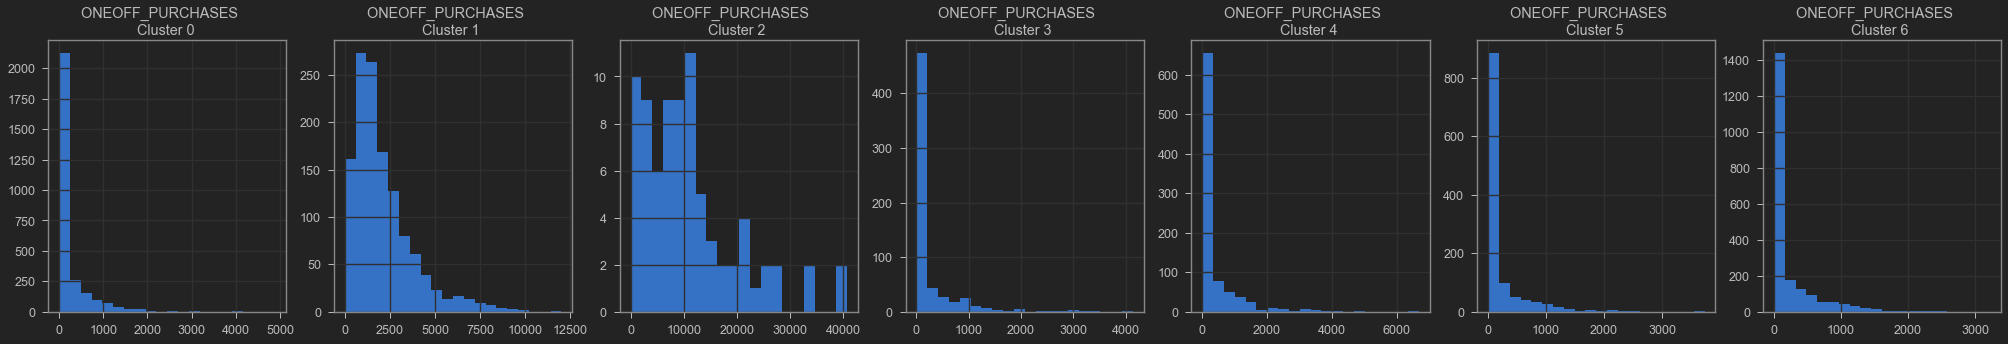

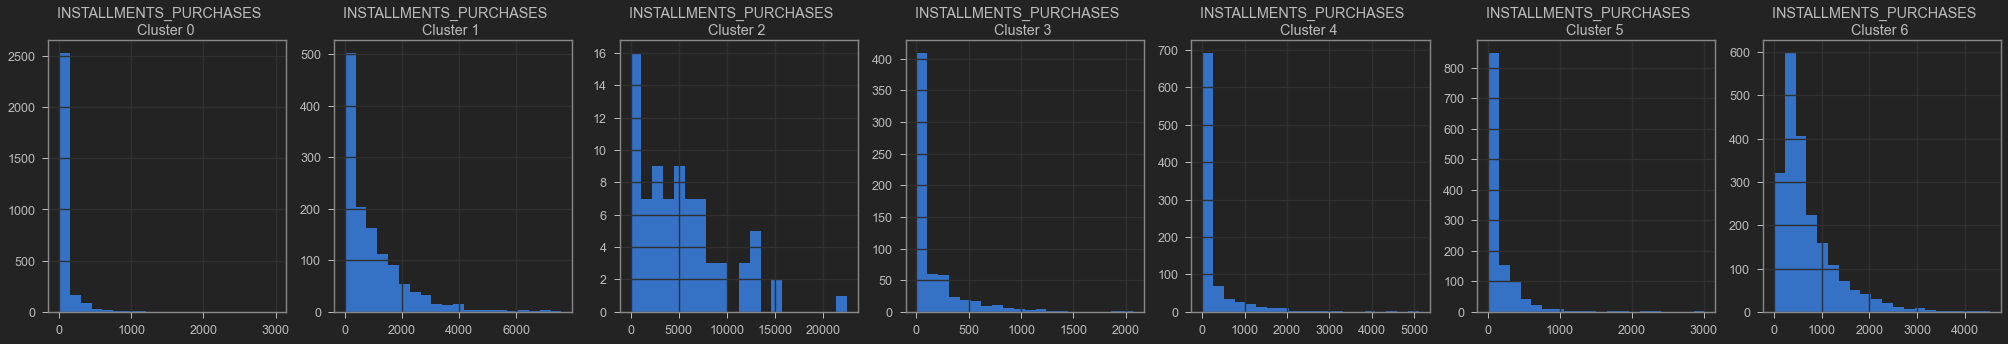

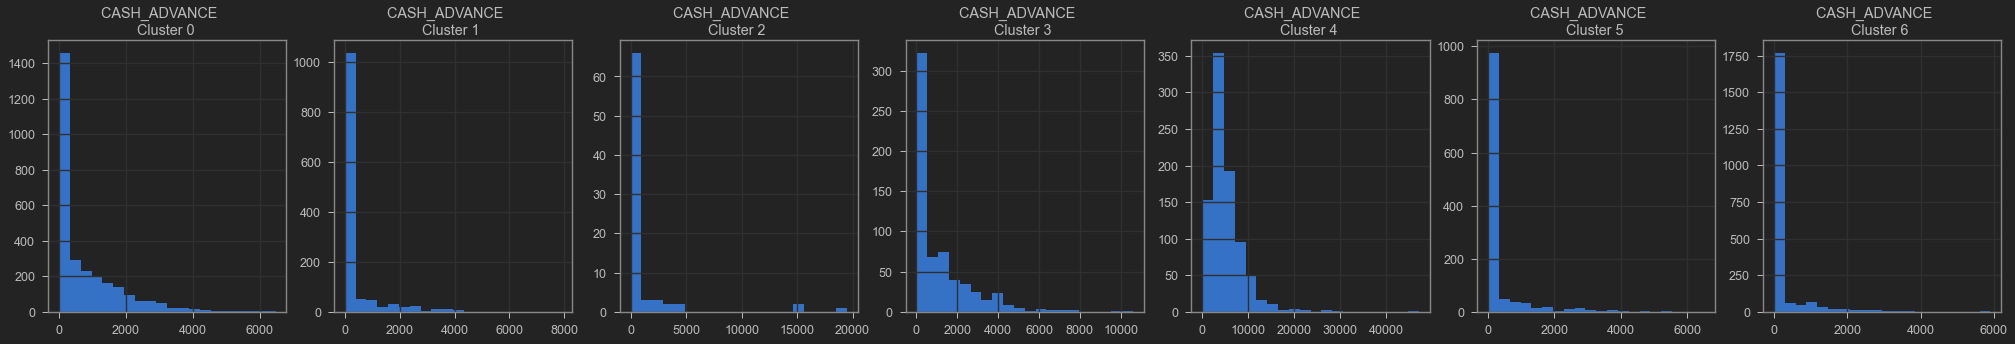

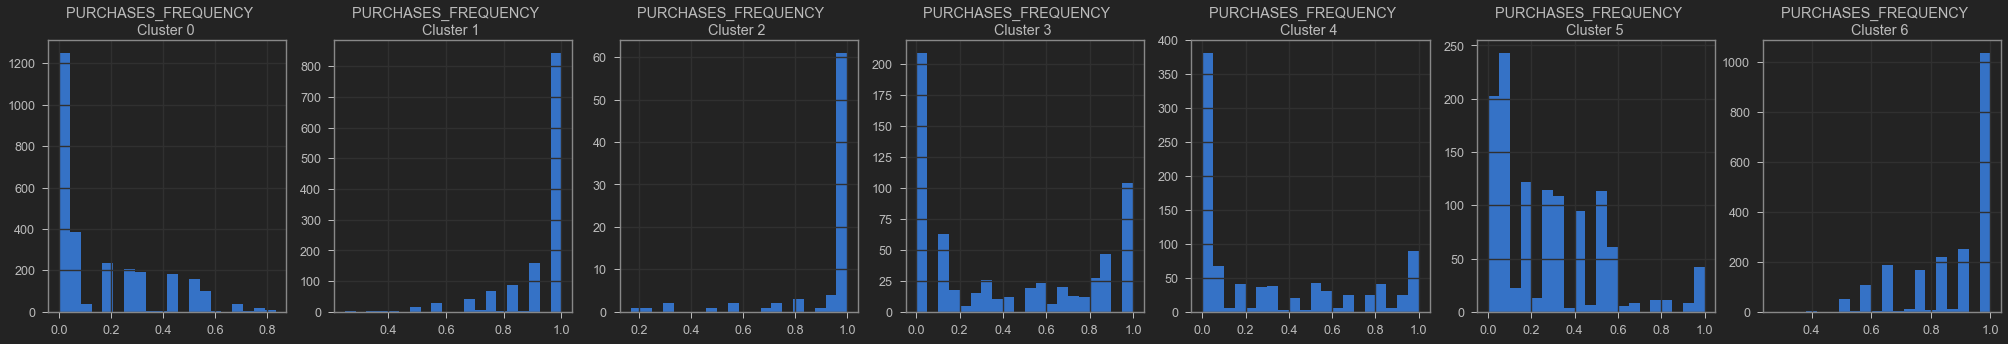

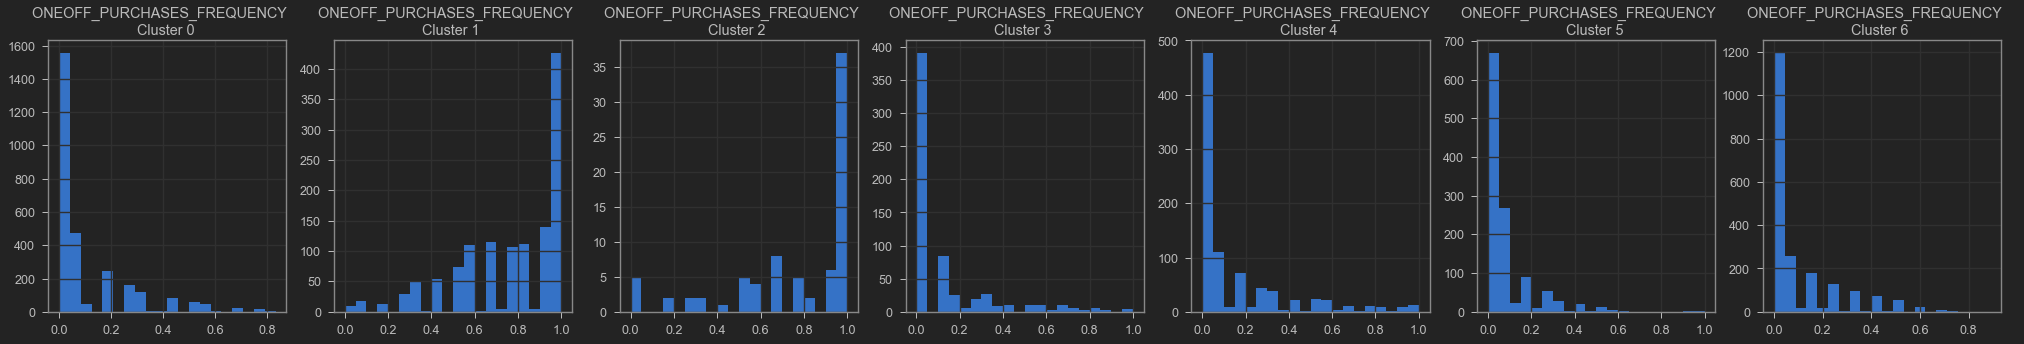

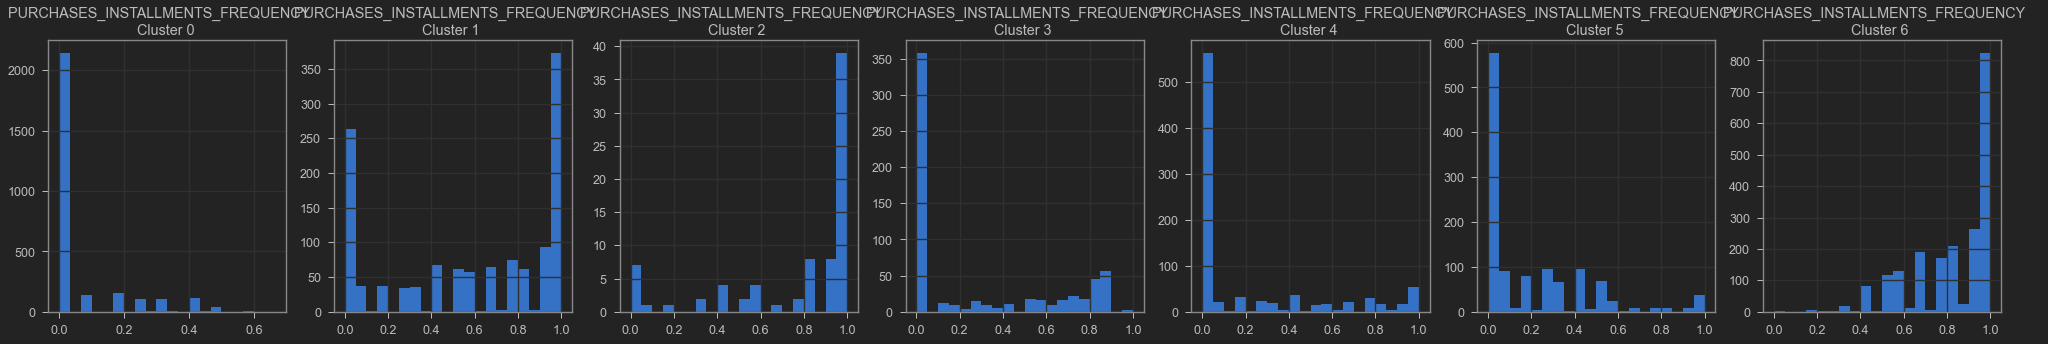

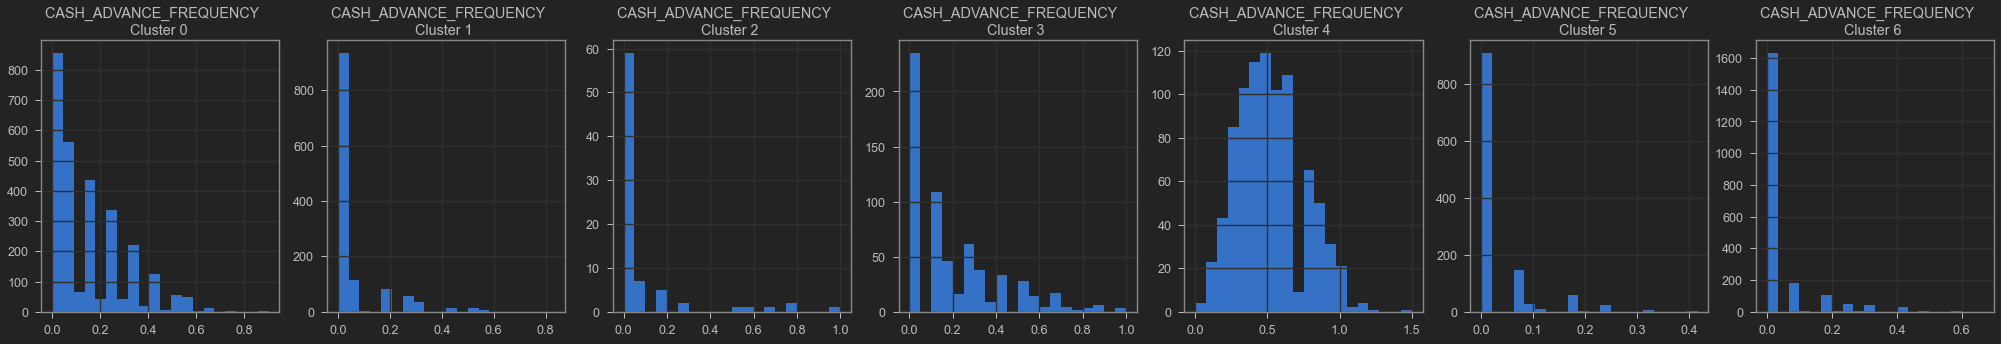

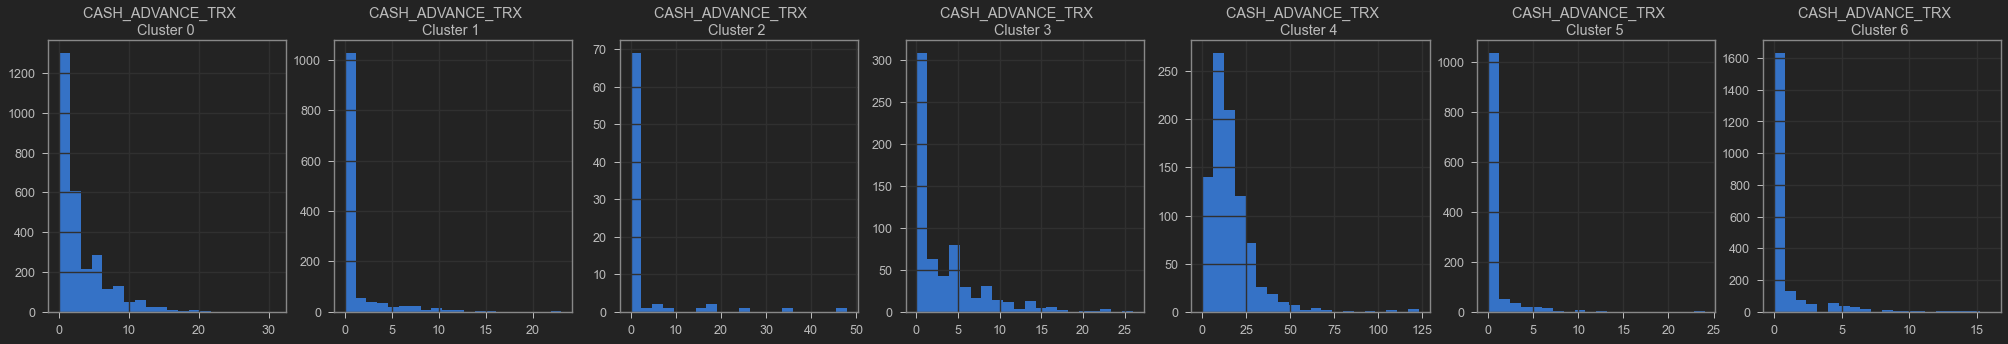

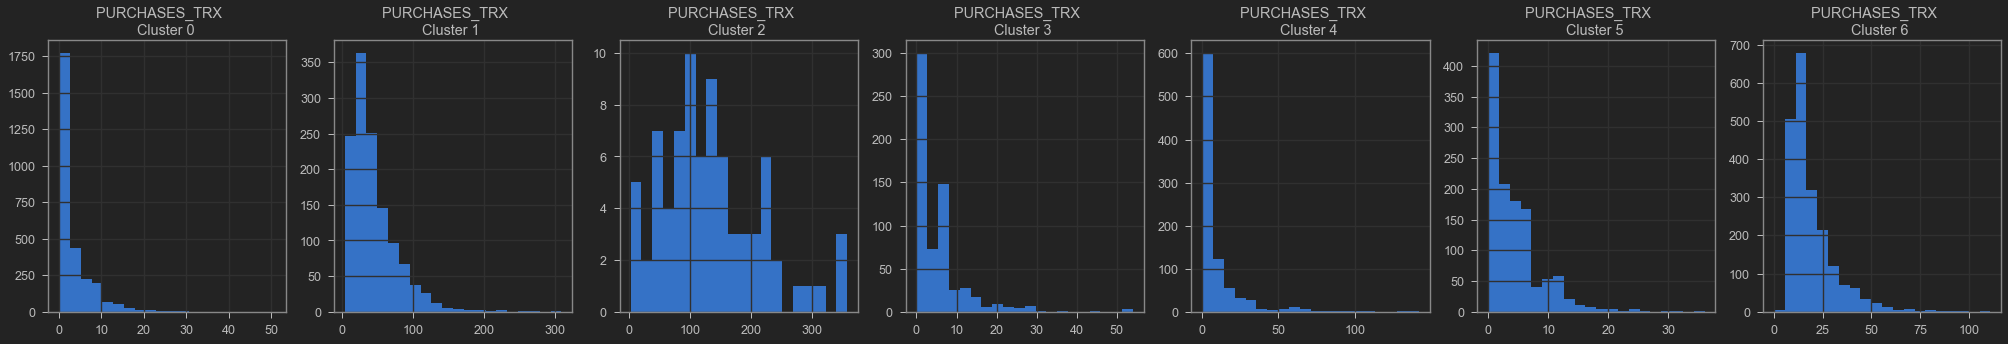

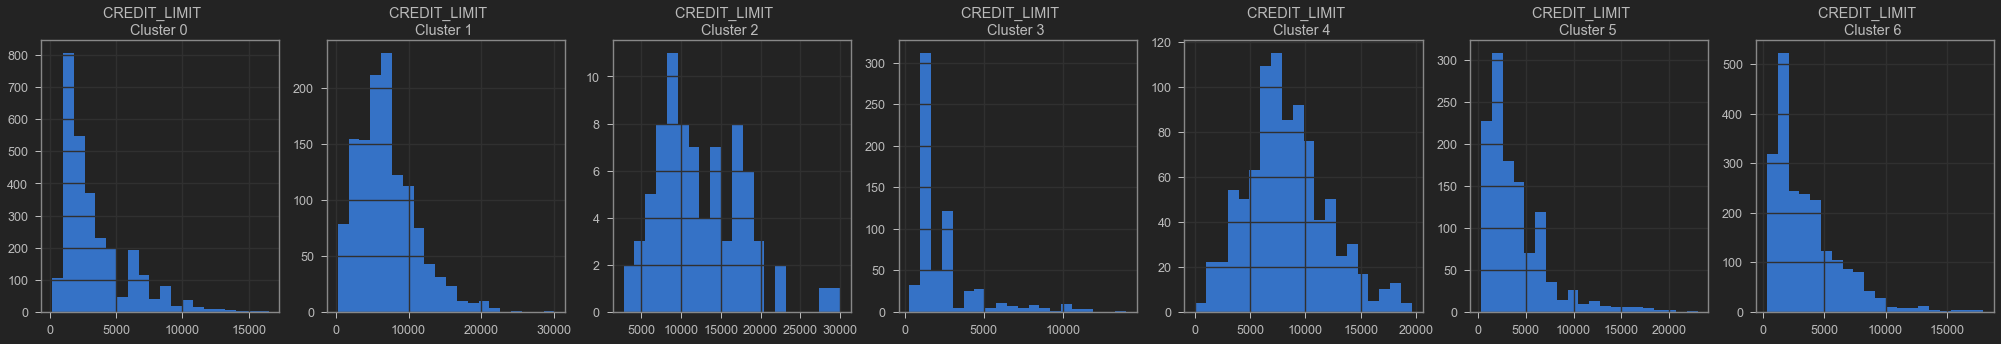

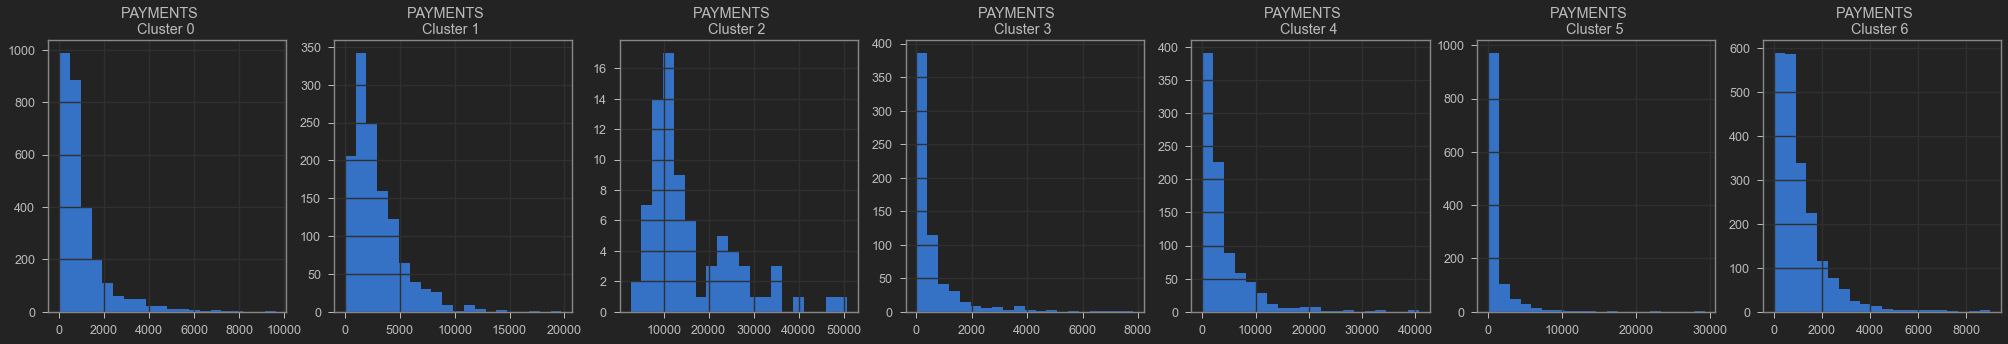

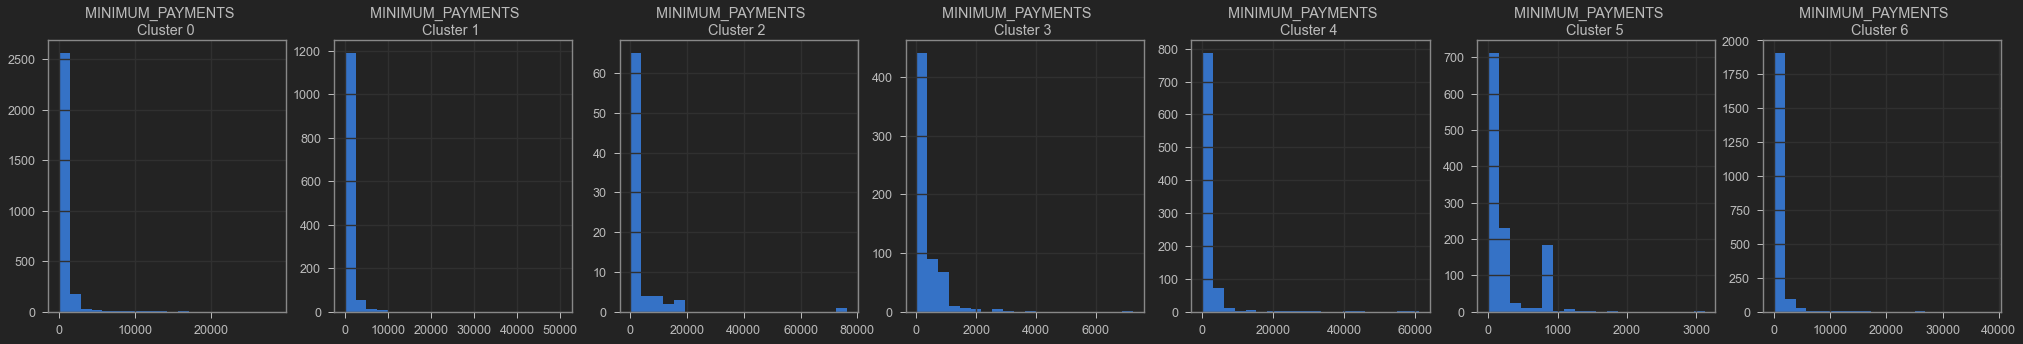

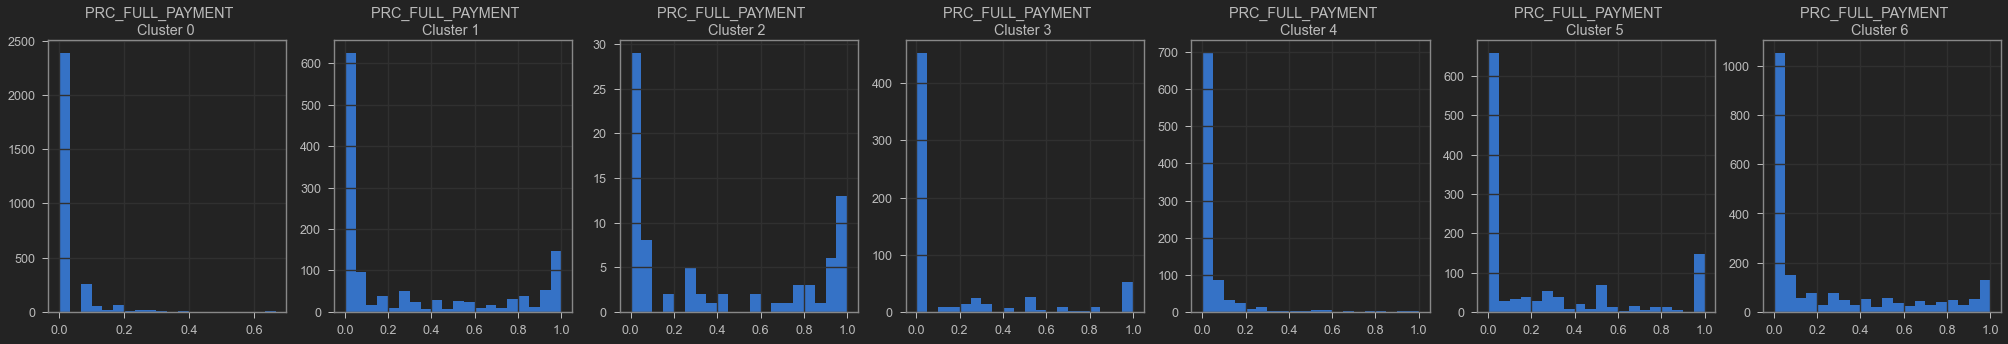

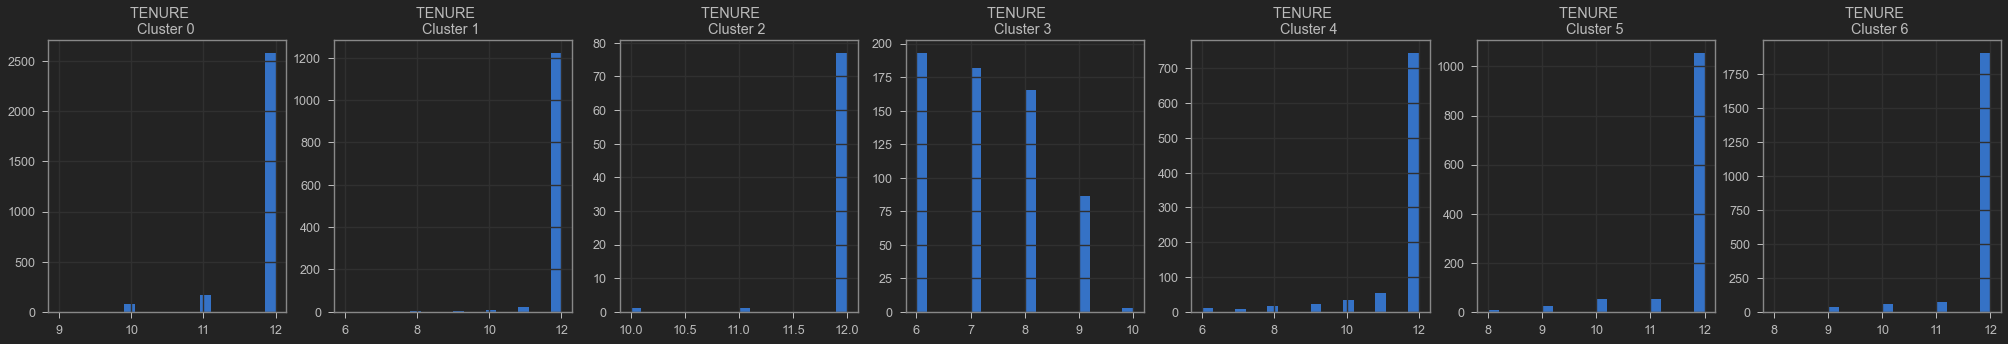

In [55]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



In [63]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222114, -1.07645196],
       [-1.1382949 ,  2.50648727],
       [ 0.9696827 , -0.38351305],
       ...,
       [-0.92620497, -1.810791  ],
       [-2.33655152, -0.65797802],
       [-0.55641959, -0.40046817]])

In [64]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138295,2.506487
2,0.969683,-0.383513
3,-0.873628,0.043168
4,-1.599435,-0.688584


In [65]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,0
1,-1.138295,2.506487,4
2,0.969683,-0.383513,1
3,-0.873628,0.043168,0
4,-1.599435,-0.688584,0


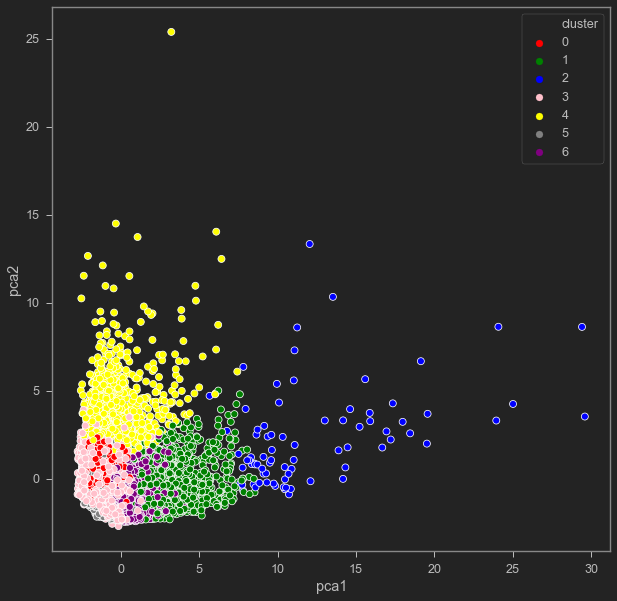

In [69]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()